# Deep learning munticlass classification

In this notebook my task is to classify chinese characters using deep learnign. In this case I rather use the tensorflow framework for the Neural Network development.


### Importing the main libraries

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

import os

## 1 - Problematic

The problematic here is to determinate which digit is being represented in an image using a RNA. Our Neural Network will caculate which character is the most probable among the 15 possible digits analysing the current image. 

The database used in this notebook is the Chinese-MNIST, https://www.kaggle.com/gpreda/chinese-mnist


## 2 - Training data 


### 2.1 Load Data

In [2]:
data_df = pd.read_csv('archive\chinese_mnist.csv')
data_df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


### 2.2 Inspecting data

Let's see how many line do we have for each class and if we have any Nan values.

In [3]:
data_df.groupby(["value","character"]).size()

value      character
0          零            1000
1          一            1000
2          二            1000
3          三            1000
4          四            1000
5          五            1000
6          六            1000
7          七            1000
8          八            1000
9          九            1000
10         十            1000
100        百            1000
1000       千            1000
10000      万            1000
100000000  亿            1000
dtype: int64

In [4]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
suite_id,0,0.0
sample_id,0,0.0
code,0,0.0
value,0,0.0
character,0,0.0


In [8]:
# Verify how many images we have
image_files = list(os.listdir("archive\data\data"))
print("Number of images: {}".format(len(image_files)))

Number of images: 15000


### 2.3 Applying the image file to the dataframe

In [9]:
def image_files(x):
    file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    return file_name
data_df["file"] = data_df.apply(image_files, axis=1)

def image_sizes(file_name):
    image = cv2.imread("archive/data/data/" + file_name)
    return list(image.shape)

data_df = pd.concat([data_df],axis=1, sort=False)

data_df.head()

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_34608\2202202394.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"


,suite_id,sample_id,code,value,character,file
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


## 3. Processing Data

Here I'm going to prepare the data to train the neural network, I'll use 80% of imagens for training and 20% for testing.

In [18]:
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42, stratify=data_df["code"].values)

print("Train set: {}".format(train_df.shape))
print("Test set: {}".format(test_df.shape))

Train set: (12000, 6)
Test set: (3000, 6)


Images need to be uploaded, resized and normalized. To do this we will use a function that loads the images, resizes them to (64, 64) and normalizes the pixels to have real values ​​between 0 and 1.

We also need a function to create the digit class corresponding to each image.

In [14]:
def read_image(file_name):
    print(file_name)
    image = cv2.imread("archive/data/data/" + file_name, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))
    image = image/255.0 
    return image

def categories_encoder(dataset, var='character'):
    X = np.stack(dataset['file'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

print('Images Tensor Shape (Train):', X_train.shape)
print('Images Tensor Shape (Test)', X_test.shape)
print('Class Tensor Shape (Train)', y_train.shape)
print('Class Tensor Shape (Test)', y_test.shape)

input_46_5_6.jpg
input_37_7_12.jpg
input_3_2_1.jpg
input_4_6_6.jpg
input_25_4_5.jpg
input_71_8_7.jpg
input_62_9_11.jpg
input_67_5_1.jpg
input_8_9_9.jpg
input_97_1_10.jpg
input_95_8_4.jpg
input_80_10_10.jpg
input_86_3_8.jpg
input_34_10_15.jpg
input_10_10_12.jpg
input_9_8_8.jpg
input_25_9_9.jpg
input_83_7_7.jpg
input_71_1_9.jpg
input_73_8_12.jpg
input_89_9_1.jpg
input_96_4_12.jpg
input_9_8_1.jpg
input_2_7_4.jpg
input_46_3_10.jpg
input_19_3_2.jpg
input_99_1_3.jpg
input_88_4_15.jpg
input_77_2_14.jpg
input_83_2_13.jpg
input_10_4_15.jpg
input_96_10_5.jpg
input_59_3_10.jpg
input_13_10_13.jpg
input_43_10_12.jpg
input_91_10_13.jpg
input_44_2_10.jpg
input_70_10_5.jpg
input_86_6_15.jpg
input_35_7_3.jpg
input_30_9_10.jpg
input_11_6_14.jpg
input_69_7_13.jpg
input_82_10_5.jpg
input_68_4_6.jpg
input_76_2_8.jpg
input_37_3_8.jpg
input_83_6_7.jpg
input_14_4_11.jpg
input_62_7_12.jpg
input_39_1_13.jpg
input_97_2_8.jpg
input_4_1_9.jpg
input_58_10_3.jpg
input_64_5_6.jpg
input_29_7_1.jpg
input_86_8_8.jpg
inp

As I'm going to process the images with a network of dense layers, I must transform them into vectors.

In [15]:
# Resizing into vectors
X_train_flat = np.reshape(X_train, (12000, 64*64))
X_test_flat = np.reshape(X_test, (3000, 64*64))

# Transforming the vector into numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

print('Image Tensor Shape (Train)', X_train_flat.shape)
print('Image Tensor Shape (Test)', X_test_flat.shape)
print('Class Tensor Shape (Train)', y_train.shape)
print('Class Tensor Shape (Test)', y_test.shape)
print('Minimum and maximum values ​​of image pixels:', np.min(X_train_flat), np.max(X_train_flat))

Image Tensor Shape (Train) (12000, 4096)
Image Tensor Shape (Test) (3000, 4096)
Class Tensor Shape (Train) (12000, 15)
Class Tensor Shape (Test) (3000, 15)
Minimum and maximum values ​​of image pixels: 0.0 1.0


y = 4 (y_hot=[False False False False  True False False False False False False False
 False False False])


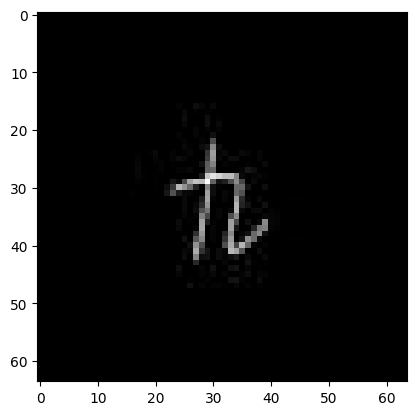

In [16]:
index = 32
plt.imshow(X_train[index], cmap='gray')
print ("y = " + str(np.argmax(y_train[index])) + " (y_hot=" + str(y_train[index]) + ")")

## Setting and compiling the RNA

The RNA consists in 3 Dense layers to process the image vectors and 1 Layer with Softmax activation to classify the images.

In order to reduce the overfitting problem I'll use Dropout layers between the process layers and L2 regularization

In [36]:

rna = models.Sequential()
rna.add(layers.Dense(1024, activation='relu', input_shape=(4096,)))
rna.add(layers.Dropout(0.2))
rna.add(layers.Dense(480,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
rna.add(layers.Dropout(0.2))
rna.add(layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
rna.add(layers.Dropout(0.2))
rna.add(layers.Dense(15, activation='softmax'))

rna.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 480)            │       492,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       123,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,814,319 (18.37 MB)

 Trainable params: 4,814,319 (18.37 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
adam = optimizers.Adam()

rna.compile(optimizer=adam, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [38]:
history = rna.fit(X_train_flat, y_train, epochs=40, batch_size=1024, validation_data=(X_test_flat, y_test))

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - categorical_accuracy: 0.1238 - loss: 11.4091 - val_categorical_accuracy: 0.3050 - val_loss: 8.1605
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.2871 - loss: 7.3765 - val_categorical_accuracy: 0.3943 - val_loss: 5.3099
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.4074 - loss: 4.8706 - val_categorical_accuracy: 0.4990 - val_loss: 3.6983
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.5138 - loss: 3.3871 - val_categorical_accuracy: 0.5667 - val_loss: 2.7273
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.5954 - loss: 2.4949 - val_categorical_accuracy: 0.6310 - val_loss: 2.1287
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - categorical_accuracy: 0.6434 - loss: 1.9642 - val_categorical_accuracy: 0.6827 - val_loss: 1.7766
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.6960 - loss: 1.6

## Plot Learning curve

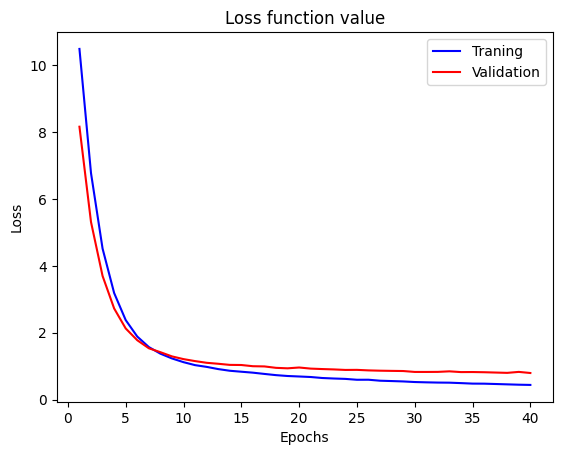

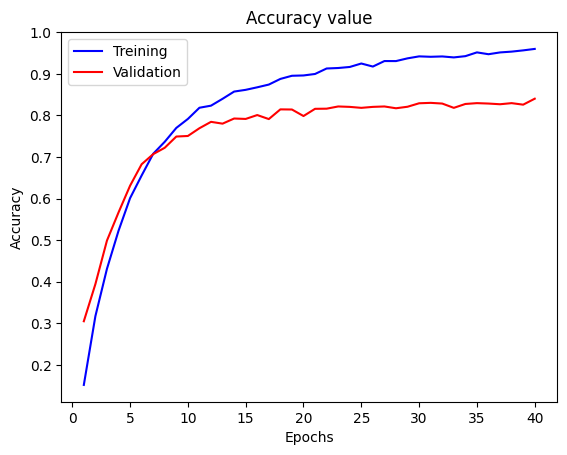

In [39]:
history_dict = history.history
loss = history_dict['loss']
accuracy = history_dict['categorical_accuracy']
loss_val = history_dict['val_loss']
accuracy_val = history_dict['val_categorical_accuracy']

# Cria vetor de épocas
epochs= range(1, len(loss) + 1)

# Gráfico do custo em função das épocas
loss = history_dict['loss']
plt.plot(epochs, loss, 'b', label='Traning')
plt.plot(epochs, loss_val, 'r', label='Validation')
plt.title('Loss function value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfico da exatidão em função das épocas
plt.plot(epochs, accuracy, 'b', label='Treining')
plt.plot(epochs, accuracy_val, 'r', label='Validation')
plt.title('Accuracy value')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation

In [40]:
loss_and_metrics_train = rna.evaluate(X_train_flat, y_train)
loss_e_metrics_test = rna.evaluate(X_test_flat, y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9758 - loss: 0.3808
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8327 - loss: 0.7904


## Plot de predicted classes X real classes

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


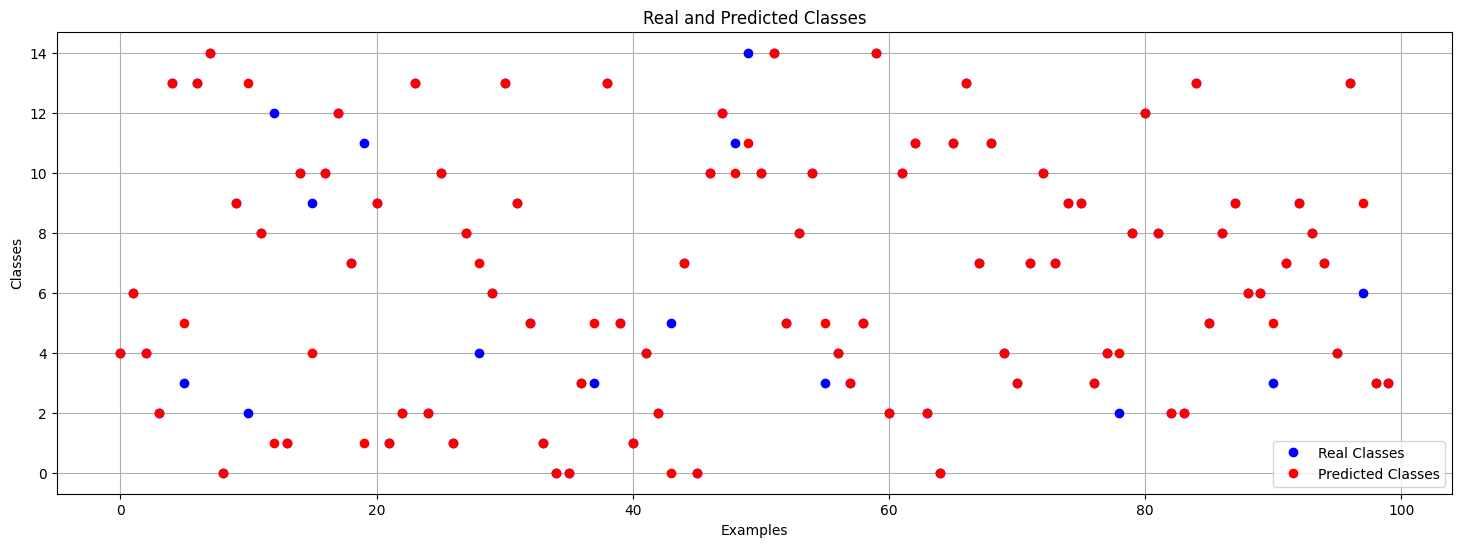

In [41]:
y_pred = rna.predict(X_test_flat)

class_pred = np.argmax(y_pred, axis=1)
class_real = np.argmax(y_test, axis=1)

plt.figure(figsize=(18,6))
plt.plot(class_real[:100], 'bo', label='Real Classes')
plt.plot(class_pred[:100], 'ro', label="Predicted Classes")
plt.title('Real and Predicted Classes')
plt.xlabel('Examples')
plt.ylabel('Classes')
plt.grid()
plt.legend()
plt.show()

## Confusion Matrix

Confusion Matrix:
 [[190   0   0   0   0   7   0   0   0   3   0   0   0   0   0]
 [  0 173   1   0  10   1   3   2   0   2   2   2   3   1   0]
 [  0   1 152   0  13   0   1   1   0  10   0   1   4  11   6]
 [  0   1   0 158   0  31   5   0   0   2   0   3   0   0   0]
 [  0   9   8   0 160   0   1  14   3   1   0   0   1   1   2]
 [  6   1   0   8   0 181   0   0   0   4   0   0   0   0   0]
 [  0   9   0   1   4   0 176   0   0   3   0   1   0   6   0]
 [  0   0   0   0  23   0   1 166   1   1   0   0   8   0   0]
 [  1   1   2   0   5   0   0   3 186   1   0   0   1   0   0]
 [  1   4   3   0  19   1   3   1   3 159   2   2   2   0   0]
 [  4   2   4   0   1   0   0   0   0   4 173  12   0   0   0]
 [  1   4   1   0   2   1   2   1   0   2  36 147   0   1   2]
 [  0   4   3   0   4   0   0   7   0   1   0   1 174   5   1]
 [  0   6  18   0   5   0   6   1   0   2   0   0   5 149   8]
 [  0   0   5   0   0   0   0   0   0   0   0   1   0  17 177]]


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_34608\987983776.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_34608\987983776.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


<Figure size 1500x1500 with 0 Axes>

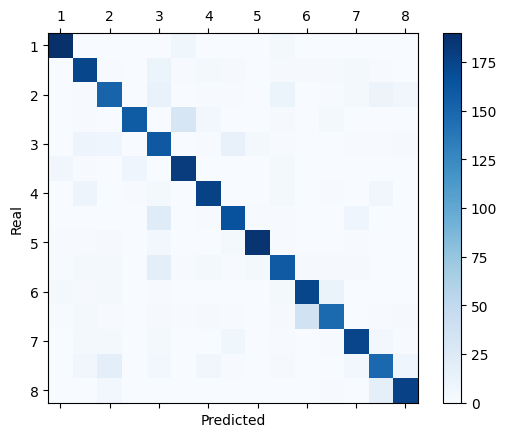

In [43]:
conf_mat = confusion_matrix(y_true= class_real, y_pred=class_pred)

print('Confusion Matrix:\n', conf_mat)

matrix_labels = [i for i in range(0,16)]
labels = matrix_labels

plt.figure(figsize=(15,15))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()